In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spambase_csv.csv to spambase_csv.csv


Gaussian (naive bayes)
Columns in dataset:
 ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'c

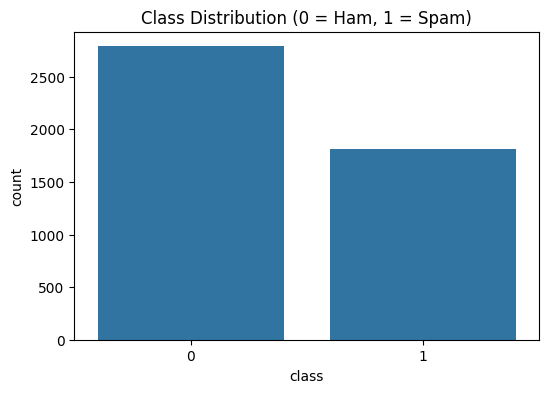

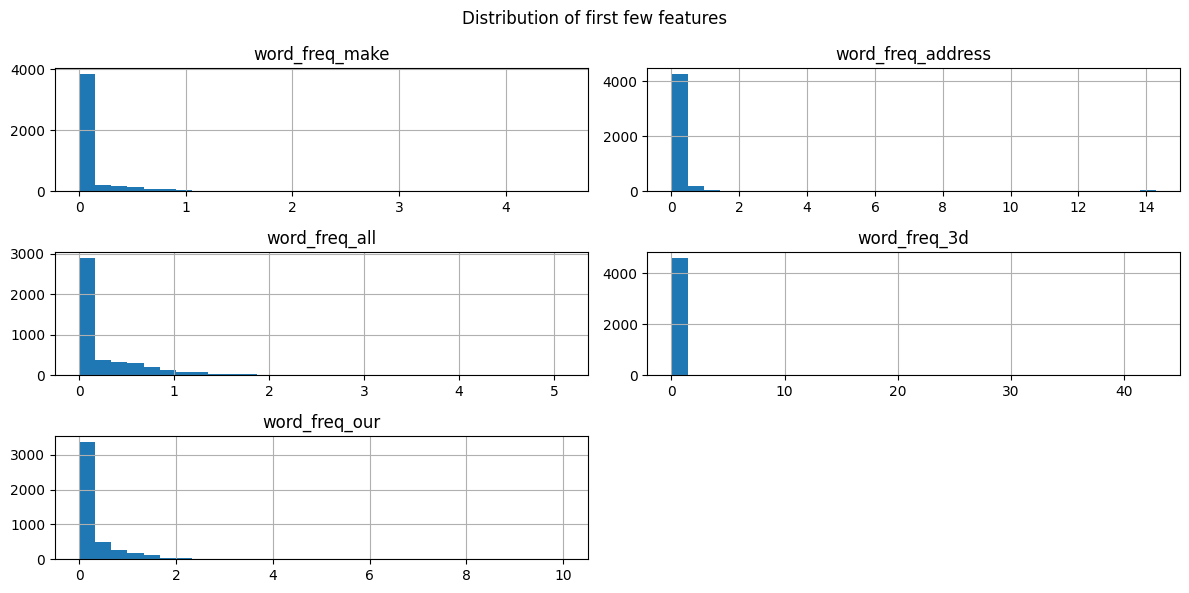


 Classification Metrics (for class 1 - SPAM):
Precision : 0.71
Recall    : 0.96
F1-score  : 0.82
Accuracy  : 0.83

 Confusion Matrix:
[[419 139]
 [ 15 348]]


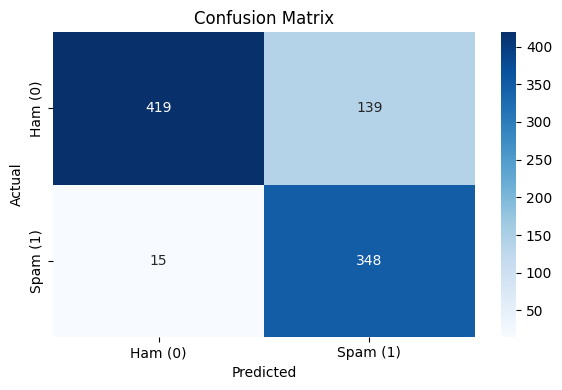

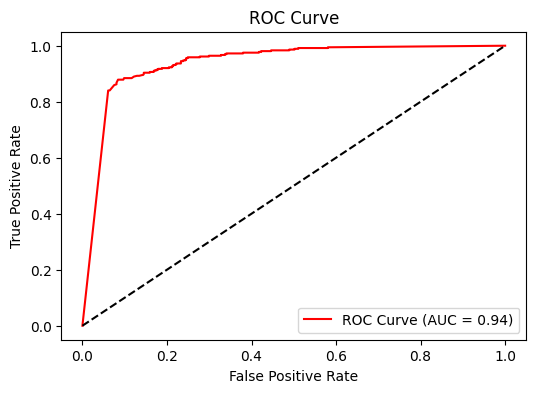


--- 5-Fold Cross Validation Results ---
Average Accuracy : 0.8153
Average Precision: 0.6933
Average Recall   : 0.9557
Average F1-Score : 0.8031


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc



print("Gaussian (naive bayes)")
# 1. Load Dataset
df = pd.read_csv('spambase_csv.csv')
print("Columns in dataset:\n", df.columns.tolist())
print("Dataset shape:", df.shape)

# 2. Separate features and target
# The last column is the target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Check for missing values
print("\nMissing values in dataset:", df.isnull().sum().sum())

# 4. EDA
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class Distribution (0 = Ham, 1 = Spam)")
plt.show()

# Basic histogram of a few features
X.iloc[:, :5].hist(bins=30, figsize=(12, 6))
plt.suptitle("Distribution of first few features")
plt.tight_layout()
plt.show()

# 5. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 7. Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 8. Evaluate on Test Set
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


report = classification_report(y_test, y_pred, output_dict=True)

print("\n Classification Metrics (for class 1 - SPAM):")
print(f"Precision : {report['1']['precision']:.2f}")
print(f"Recall    : {report['1']['recall']:.2f}")
print(f"F1-score  : {report['1']['f1-score']:.2f}")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.2f}")

# Print confusion matrix
print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
labels = ['Ham (0)', 'Spam (1)']

# Plot using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


# ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})",color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 9. K-Fold Cross-Validation (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')

print("\n--- 5-Fold Cross Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1-Score : {cv_f1.mean():.4f}")


Multinominal (naive Bayes)

 Classification Metrics (for class 1 - SPAM):
Precision : 0.94
Recall    : 0.78
F1-score  : 0.85
Accuracy  : 0.89

Confusion Matrix:
[[541  17]
 [ 81 282]]


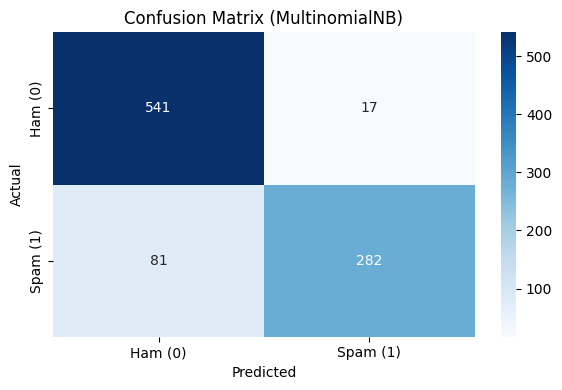

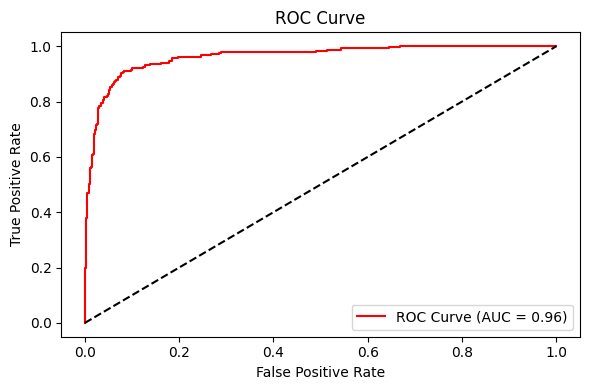


--- 5-Fold Cross Validation Results ---
Average Accuracy : 0.8863
Average Precision: 0.9364
Average Recall   : 0.7639
Average F1-Score : 0.8412


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('spambase_csv.csv')
print("Multinominal (naive Bayes)")
# 2. Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Normalize features to [0, 1] range (MultinomialNB requires non-negative)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 5. Train Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
print("\n Classification Metrics (for class 1 - SPAM):")
print(f"Precision : {report['1']['precision']:.2f}")
print(f"Recall    : {report['1']['recall']:.2f}")
print(f"F1-score  : {report['1']['f1-score']:.2f}")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.2f}")

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
labels = ['Ham (0)', 'Spam (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (MultinomialNB)')
plt.tight_layout()
plt.show()

# 9. ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# 10. 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')

print("\n--- 5-Fold Cross Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1-Score : {cv_f1.mean():.4f}")


Bernaulli (Naive Bayes)

 Classification Metrics (for class 1 - SPAM):
Precision : 0.70
Recall    : 0.86
F1-score  : 0.77
Accuracy  : 0.80

Confusion Matrix:
[[427 131]
 [ 52 311]]


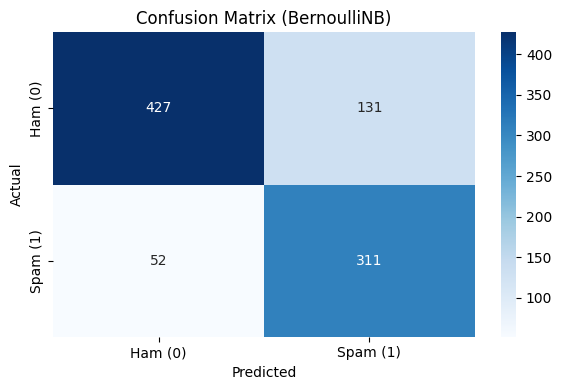

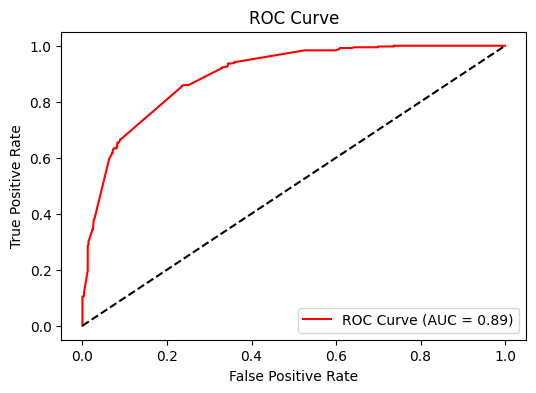


--- 5-Fold Cross Validation Results ---
Average Accuracy : 0.8040
Average Precision: 0.7028
Average Recall   : 0.8708
Average F1-Score : 0.7776


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv('spambase_csv.csv')

# 2. Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print("Bernaulli (Naive Bayes)")

binarizer = Binarizer(threshold=X.median().mean())
X_bin = binarizer.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.2, stratify=y, random_state=42)

# 5. Train BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
print("\n Classification Metrics (for class 1 - SPAM):")
print(f"Precision : {report['1']['precision']:.2f}")
print(f"Recall    : {report['1']['recall']:.2f}")
print(f"F1-score  : {report['1']['f1-score']:.2f}")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.2f}")

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
labels = ['Ham (0)', 'Spam (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (BernoulliNB)')
plt.tight_layout()
plt.show()


# 10. ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 11. 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_bin, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_bin, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_bin, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_bin, y, cv=kf, scoring='f1')

print("\n--- 5-Fold Cross Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1-Score : {cv_f1.mean():.4f}")


Ball tree (KNN)

Training Time: 0.0124 seconds

Classification Metrics (for class 1 - SPAM):
Precision : 0.89
Recall    : 0.87
F1-score  : 0.88
Accuracy  : 0.91

Confusion Matrix:
[[518  40]
 [ 47 316]]


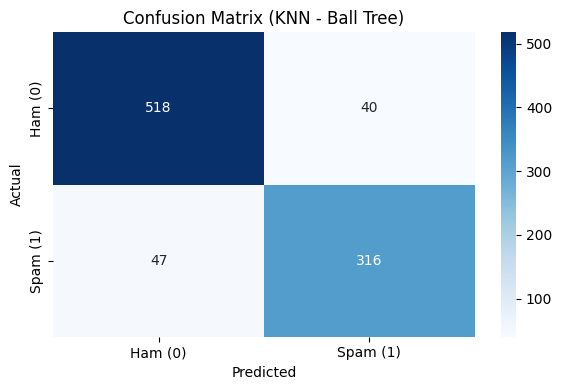

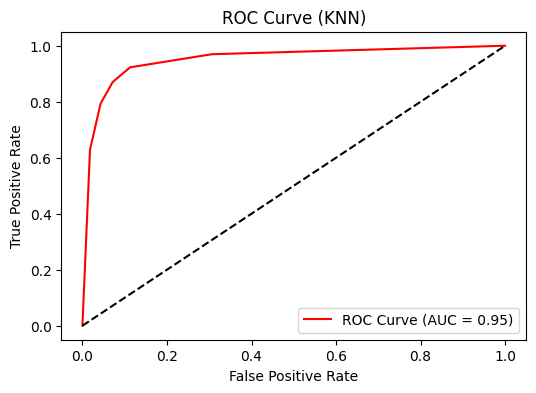


--- 5-Fold Cross Validation Results ---
Average Accuracy : 0.9085
Average Precision: 0.8983
Average Recall   : 0.8663
Average F1-Score : 0.8820


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt
import time

# 1. Load dataset
df = pd.read_csv('spambase_csv.csv')
print("Ball tree (KNN)")
# 2. Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Feature Scaling (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 5. Train KNN with Ball Tree
model = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"\nTraining Time: {training_time:.4f} seconds")

# 6. Predict
y_pred = model.predict(X_test)

# 7. Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Metrics (for class 1 - SPAM):")
print(f"Precision : {report['1']['precision']:.2f}")
print(f"Recall    : {report['1']['recall']:.2f}")
print(f"F1-score  : {report['1']['f1-score']:.2f}")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.2f}")

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
labels = ['Ham (0)', 'Spam (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN - Ball Tree)')
plt.tight_layout()
plt.show()

# 9. ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (KNN)")
plt.legend()
plt.show()

# 10. 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')

print("\n--- 5-Fold Cross Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1-Score : {cv_f1.mean():.4f}")


KD tree(KNN)

Training Time: 0.0188 seconds

 Classification Metrics (for class 1 - SPAM):
Precision : 0.89
Recall    : 0.87
F1-score  : 0.88
Accuracy  : 0.91

Confusion Matrix:
[[518  40]
 [ 47 316]]


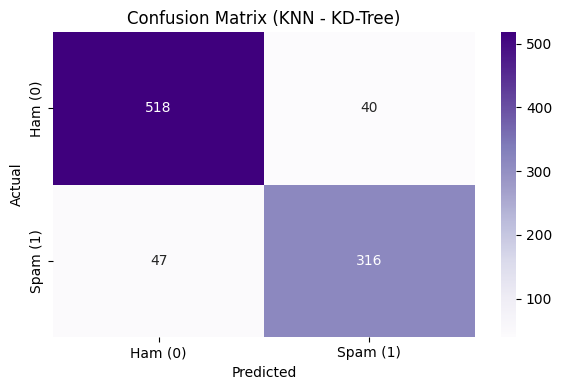

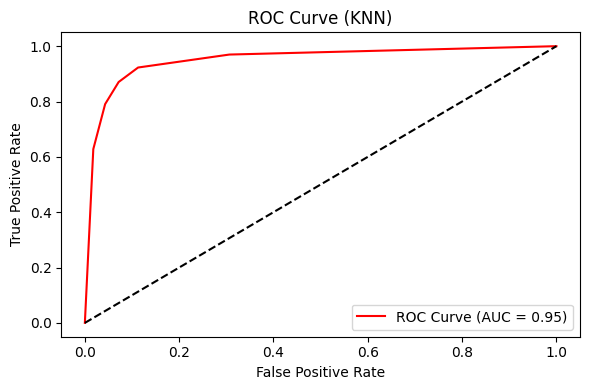


--- 5-Fold Cross Validation Results ---
Average Accuracy : 0.9085
Average Precision: 0.8983
Average Recall   : 0.8663
Average F1-Score : 0.8820


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time


# 1. Load dataset
df = pd.read_csv('spambase_csv.csv')

# 2. Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Standardize features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("KD tree(KNN)")
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 5. KNN Classifier using KD-Tree
model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')  # You can tune k
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"\nTraining Time: {training_time:.4f} seconds")


# 6. Predict
y_pred = model.predict(X_test)

# 7. Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
print("\n Classification Metrics (for class 1 - SPAM):")
print(f"Precision : {report['1']['precision']:.2f}")
print(f"Recall    : {report['1']['recall']:.2f}")
print(f"F1-score  : {report['1']['f1-score']:.2f}")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.2f}")

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
labels = ['Ham (0)', 'Spam (1)']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN - KD-Tree)')
plt.tight_layout()
plt.show()

# 9. ROC Curve
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (KNN)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 10. 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')

print("\n--- 5-Fold Cross Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1-Score : {cv_f1.mean():.4f}")


Evaluating KNN with KD-Tree for different k values:

k =  1 -> Accuracy = 0.8979
k =  3 -> Accuracy = 0.9012
k =  5 -> Accuracy = 0.9055
k =  7 -> Accuracy = 0.9077


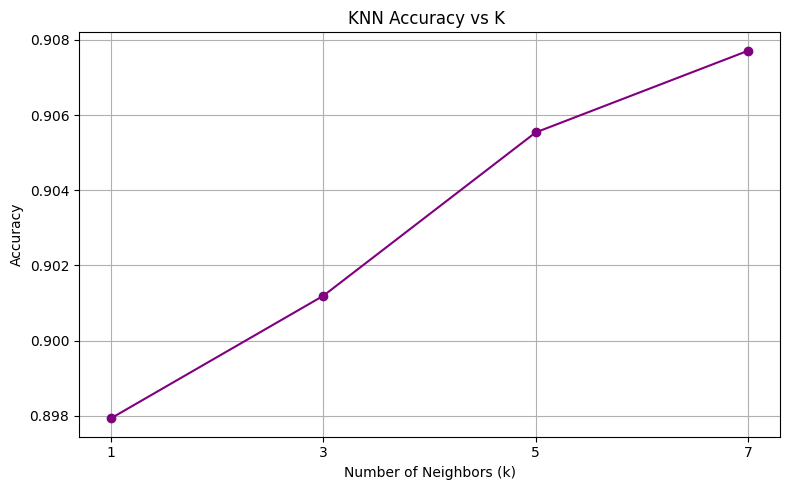


Best k based on test accuracy: 7

Classification Metrics (for class 1 - SPAM):
Precision : 0.89
Recall    : 0.87
F1-score  : 0.88
Accuracy  : 0.91

Confusion Matrix:
[[521  37]
 [ 48 315]]


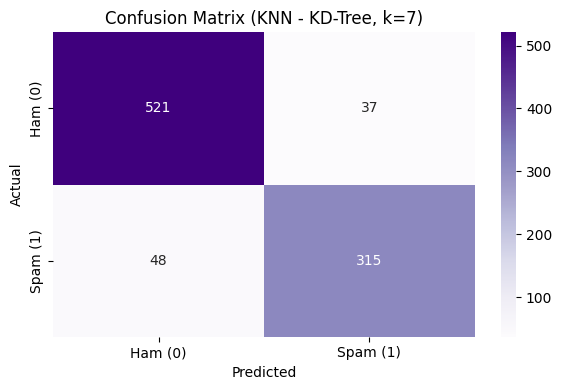

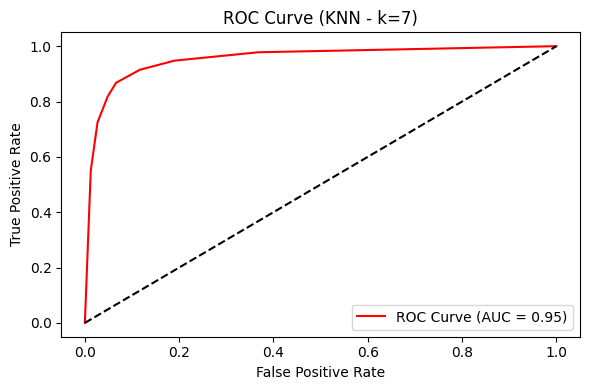


--- 5-Fold Cross Validation Results ---
Average Accuracy : 0.9068
Average Precision: 0.8990
Average Recall   : 0.8603
Average F1-Score : 0.8791


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('spambase_csv.csv')

# 2. Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 5. Varying k from 1 to 20
k_values = [1,3,5,7]
accuracy_scores = []

print("Evaluating KNN with KD-Tree for different k values:\n")
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"k = {k:2d} -> Accuracy = {acc:.4f}")

# 6. Plotting accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', color='purple')
plt.title("KNN Accuracy vs K ")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Best k and final evaluation
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest k based on test accuracy: {best_k}")

# Re-train with best k
model = KNeighborsClassifier(n_neighbors=best_k, algorithm='kd_tree')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Metrics (for class 1 - SPAM):")
print(f"Precision : {report['1']['precision']:.2f}")
print(f"Recall    : {report['1']['recall']:.2f}")
print(f"F1-score  : {report['1']['f1-score']:.2f}")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Ham (0)', 'Spam (1)'], yticklabels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (KNN - KD-Tree, k={best_k})')
plt.tight_layout()
plt.show()

# ROC Curve
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve (KNN - k={best_k})")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 8. 5-Fold Cross-Validation for best k
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')

print("\n--- 5-Fold Cross Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1-Score : {cv_f1.mean():.4f}")


Accuracy: 0.9348298334540188

Confusion Matrix:
 [[776  28]
 [ 62 515]]


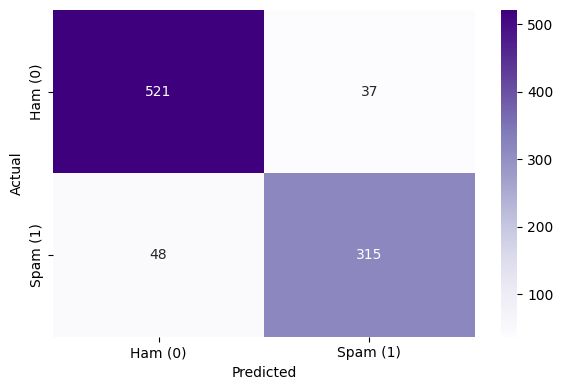

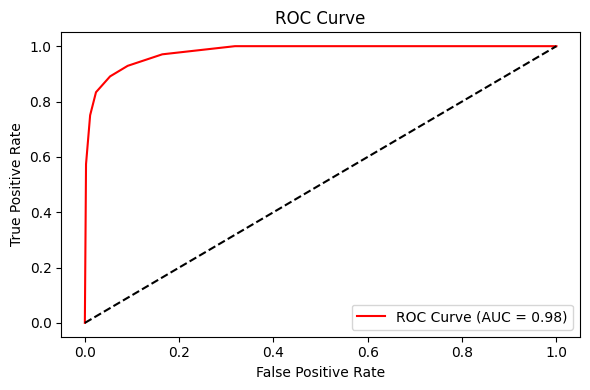


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       804
           1       0.95      0.89      0.92       577

    accuracy                           0.93      1381
   macro avg       0.94      0.93      0.93      1381
weighted avg       0.94      0.93      0.93      1381


--- 5-Fold Cross Validation Results ---
Average Accuracy : 0.9068
Average Precision: 0.8990
Average Recall   : 0.8603
Average F1-Score : 0.8791


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Split features and target
X = df.drop('class', axis=1)
y = df['class']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM model
svm = SVC(kernel='rbf')  # You can try 'linear', 'poly', or 'rbf'
svm.fit(X_train_scaled, y_train)

# 5. Predict and evaluate
y_pred = svm.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Ham (0)', 'Spam (1)'], yticklabels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
# ROC Curve
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# 10. 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')

print("\n--- 5-Fold Cross Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1-Score : {cv_f1.mean():.4f}")



Accuracy: 0.7588703837798697

Confusion Matrix:
 [[789  15]
 [318 259]]


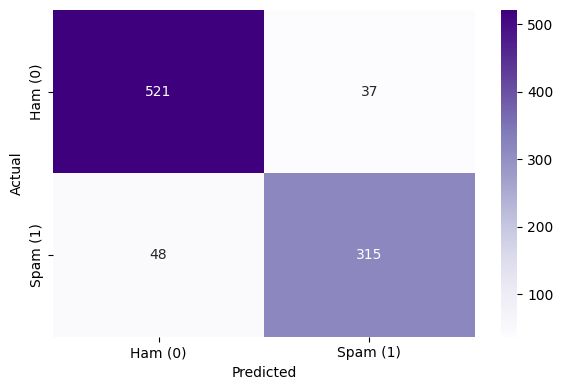

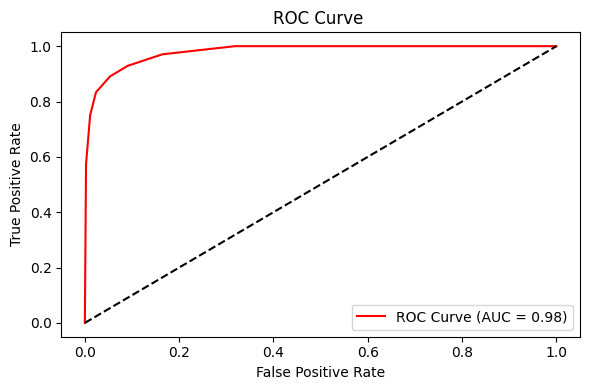


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.83       804
           1       0.95      0.45      0.61       577

    accuracy                           0.76      1381
   macro avg       0.83      0.72      0.72      1381
weighted avg       0.81      0.76      0.74      1381


--- 5-Fold Cross Validation Results ---
Average Accuracy : 0.9068
Average Precision: 0.8990
Average Recall   : 0.8603
Average F1-Score : 0.8791


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Split features and target
X = df.drop('class', axis=1)
y = df['class']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM model
svm = SVC(kernel='poly')  # You can try 'linear', 'poly', or 'rbf'
svm.fit(X_train_scaled, y_train)

# 5. Predict and evaluate
y_pred = svm.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Ham (0)', 'Spam (1)'], yticklabels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
# ROC Curve
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ")
    plt.legend()
    plt.tight_layout()
    plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# 10. 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')

print("\n--- 5-Fold Cross Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1-Score : {cv_f1.mean():.4f}")



Accuracy: 0.9268645908761767

Confusion Matrix:
 [[766  38]
 [ 63 514]]


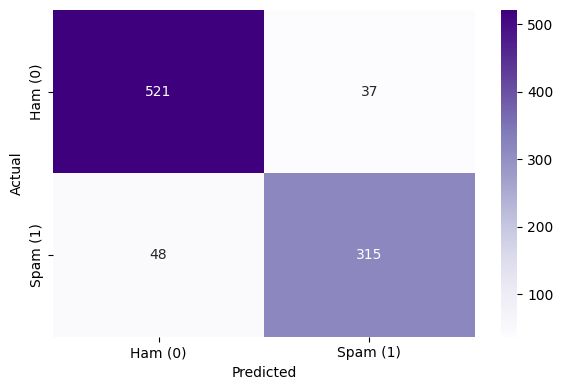

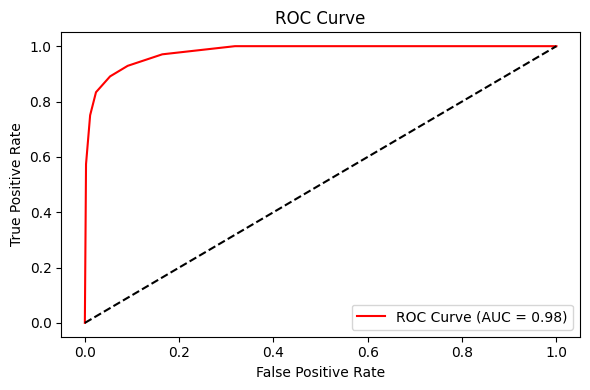


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       804
           1       0.93      0.89      0.91       577

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381


--- 5-Fold Cross Validation Results ---
Average Accuracy : 0.9068
Average Precision: 0.8990
Average Recall   : 0.8603
Average F1-Score : 0.8791


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Split features and target
X = df.drop('class', axis=1)
y = df['class']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM model
svm = SVC(kernel='linear')  # You can try 'linear', 'poly', or 'rbf'
svm.fit(X_train_scaled, y_train)

# 5. Predict and evaluate
y_pred = svm.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Ham (0)', 'Spam (1)'], yticklabels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
# ROC Curve
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# 10. 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')

print("\n--- 5-Fold Cross Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1-Score : {cv_f1.mean():.4f}")


Accuracy: 0.8819695872556119

Confusion Matrix:
 [[737  67]
 [ 96 481]]


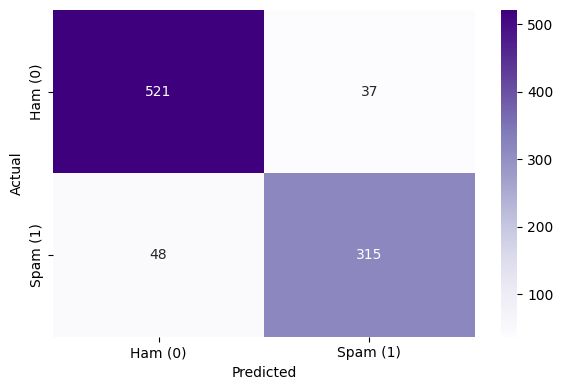

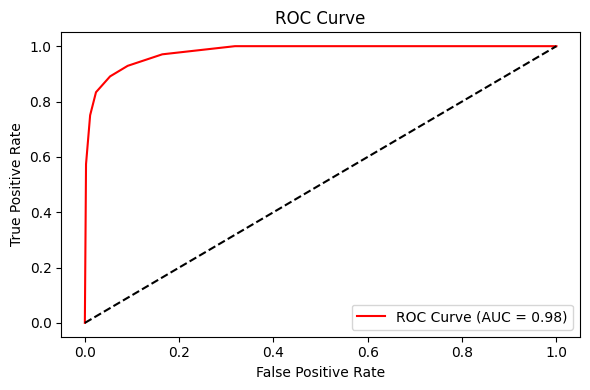


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       804
           1       0.88      0.83      0.86       577

    accuracy                           0.88      1381
   macro avg       0.88      0.88      0.88      1381
weighted avg       0.88      0.88      0.88      1381


--- 5-Fold Cross Validation Results ---
Average Accuracy : 0.9068
Average Precision: 0.8990
Average Recall   : 0.8603
Average F1-Score : 0.8791


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Split features and target
X = df.drop('class', axis=1)
y = df['class']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM model
svm = SVC(kernel='sigmoid')  # You can try 'linear', 'poly', or 'rbf'
svm.fit(X_train_scaled, y_train)

# 5. Predict and evaluate
y_pred = svm.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Ham (0)', 'Spam (1)'], yticklabels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
# ROC Curve
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# 10. 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
cv_precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
cv_recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
cv_f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')

print("\n--- 5-Fold Cross Validation Results ---")
print(f"Average Accuracy : {cv_accuracy.mean():.4f}")
print(f"Average Precision: {cv_precision.mean():.4f}")
print(f"Average Recall   : {cv_recall.mean():.4f}")
print(f"Average F1-Score : {cv_f1.mean():.4f}")
